# PyTorch WorkFlow

**WorkFlow**
1. Get data
2. Build model/ Make a model
3. Fit the model
4. Evaluate model
5. Save and load the model

## 1 Getting the Data

Data can be of the following types:
* Text
* Numbers
* Images
* Audio
* Video
* Excel
* DNA

### Linear Regression model and Collecting data

formula for linear Regression :`y=a+bX`



In [1]:
import numpy as np
import torch
from torch import nn

In [2]:
weight=-0.4
bias=3

In [3]:
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[3.0000],
         [2.9920],
         [2.9840],
         [2.9760],
         [2.9680],
         [2.9600],
         [2.9520],
         [2.9440],
         [2.9360],
         [2.9280]]))

### Splitting data into training and testing

In [4]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

### Visualizing the Dataset

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_predictions(train_data=X_train ,
                     train_label=y_train,
                     test_data=X_test,
                     test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_label,c="b",s=4,label="training data")
    plt.scatter(test_data,test_labels,c="r",s=4,label="testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="g",s=4,label="predictions")

    plt.legend(prop={"size":14})
    plt.show()


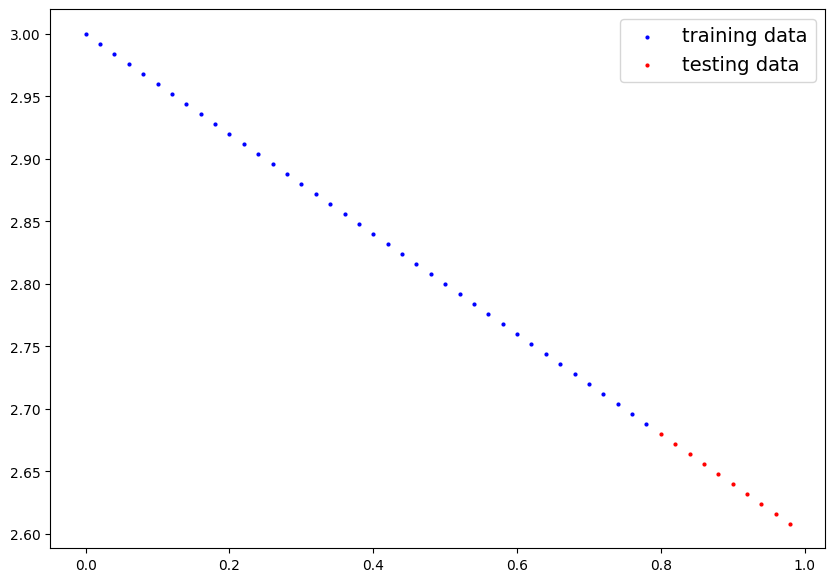

In [7]:
plot_predictions()

## Building our own model

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,
                                             requires_grad=True,   #requires Gradient
                                             dtype=torch.float)    #datatype
                                 )
        self.bias=nn.Parameter(torch.randn(1,
                                           dtype=torch.float,
                                           requires_grad=True
                                           ) )

    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weight * x + self.bias


### Using above class in our code

In [9]:
torch.manual_seed(42)
model_0=LinearRegressionModel()

model_0

LinearRegressionModel()

In [10]:
model_0.parameters()

<generator object Module.parameters at 0x000001862B5F7680>

In [11]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight,bias

(-0.4, 3)

`torch.inference_mode()` use y_test on x_test


In [14]:
with torch.inference_mode():
    y_preds=model_0.forward(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

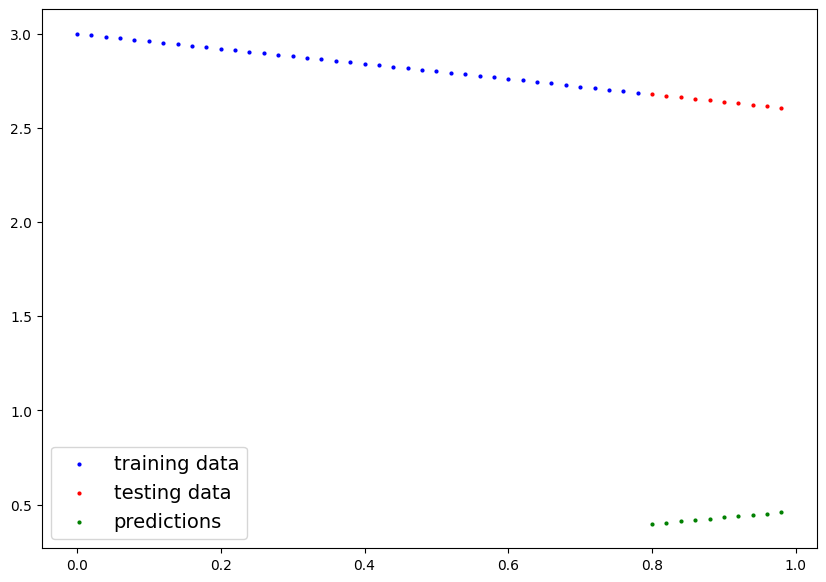

In [15]:
plot_predictions(predictions=y_preds)

## Training the model

In [16]:
#generating loss function
loss_fn=nn.L1Loss()
#generating optimizer
optimizer=torch.optim.SGD(model_0.parameters(),
                          lr=0.01
                          )

In [17]:
epochs=2000
torch.manual_seed(42)
loss_values=[]
test_loss_values=[]
epoch_count=[]
for epoch in range(epochs):
    model_0.train()         #set model to train

    #1. forward pass
    y_pred=model_0(X_train)

    #2. calculate loss
    loss=loss_fn(y_pred,y_train)
    # print(f"loss :{loss}")

    #3. optimizer
    optimizer.zero_grad()

    #4. perform back_propagataion
    loss.backward()

    #5. step the optimizer
    optimizer.step()


    model_0.eval()          #set model to turn off gradients


    with torch.inference_mode():
        test_pred=model_0.forward(X_test)
        test_loss=loss_fn(test_pred,y_test)

    if(epoch%10==0):
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)




In [18]:
with torch.inference_mode():
    y_preds=model_0.forward(X_test)
y_preds,loss_fn(y_test,y_preds)

(tensor([[2.6848],
         [2.6769],
         [2.6690],
         [2.6611],
         [2.6532],
         [2.6453],
         [2.6374],
         [2.6295],
         [2.6216],
         [2.6138]]),
 tensor(0.0053))

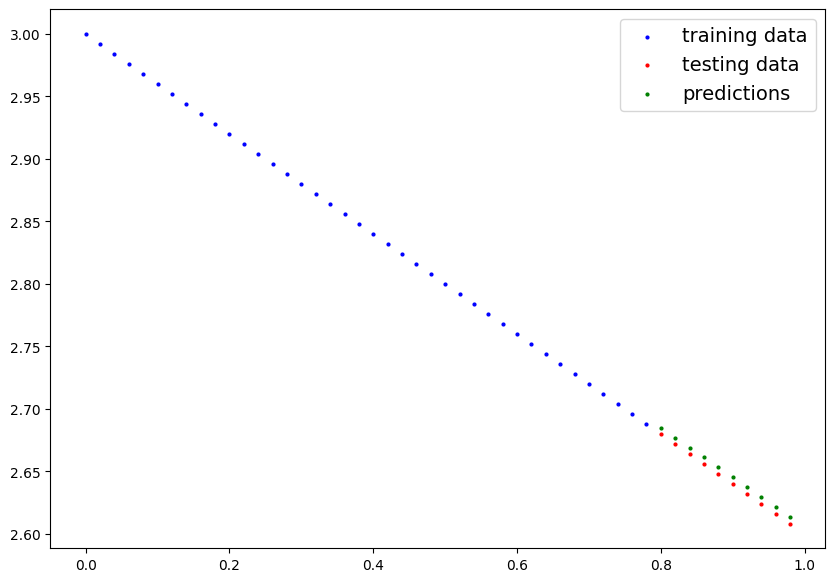

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
test_loss_values=np.array(test_loss_values)
loss_values=np.array(torch.tensor(loss_values))
test_loss_values

C:\Users\karti\AppData\Local\Temp\ipykernel_16732\2514316249.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  loss_values=np.array(torch.tensor(loss_values))


array([2.2020652e+00, 2.0673552e+00, 1.9326452e+00, 1.7979355e+00,
       1.6632258e+00, 1.5285157e+00, 1.3938060e+00, 1.2590961e+00,
       1.1243862e+00, 9.8967648e-01, 8.5496652e-01, 7.2025681e-01,
       5.8554685e-01, 4.5083714e-01, 3.1612724e-01, 1.8141739e-01,
       7.5995758e-02, 9.7716190e-02, 2.1764752e-01, 3.1742054e-01,
       3.9472932e-01, 4.5411292e-01, 5.0055420e-01, 5.3578389e-01,
       5.6292415e-01, 5.8352667e-01, 6.0051697e-01, 6.1037195e-01,
       6.1952204e-01, 6.2232840e-01, 6.2513465e-01, 6.2794077e-01,
       6.2448478e-01, 6.2033290e-01, 6.1618108e-01, 6.1202919e-01,
       6.0787743e-01, 6.0372555e-01, 5.9957373e-01, 5.9542185e-01,
       5.8920944e-01, 5.8093649e-01, 5.7266349e-01, 5.6507742e-01,
       5.5680448e-01, 5.4921836e-01, 5.4094541e-01, 5.3267246e-01,
       5.2508640e-01, 5.1681340e-01, 5.0854045e-01, 5.0095427e-01,
       4.9268135e-01, 4.8440832e-01, 4.7682229e-01, 4.6854931e-01,
       4.6027637e-01, 4.5269021e-01, 4.4441730e-01, 4.3614435e

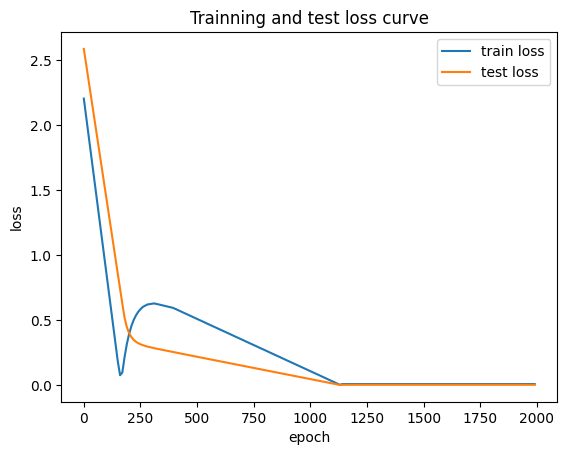

In [21]:
plt.plot(epoch_count,test_loss_values,label="train loss")
plt.plot(epoch_count,loss_values,label="test loss")
plt.title("Trainning and test loss curve")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [22]:
test_loss_values[-1:]

array([0.00819609], dtype=float32)

## Exporting the model and loading it

### Saving the model

* `torch.save()` allows you to save in python pkl
* `torch.load()` allows you to load model
* `torch.nn.Module.load_state_dict()` allows to load model from state dict dictionoary

In [32]:
from pathlib import Path

#1. Create a directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2 create model to save path
MODEL_NAME = "LinearRegressionModel.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3 Save the model and load
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)
print(f"Done!!!!")

Saving model to models\LinearRegressionModel.pth
Done!!!!


### Loading the model

In [36]:
Loaded_model_0=LinearRegressionModel()

#loading the state
Loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
Loaded_model_0.state_dict()

OrderedDict([('weight', tensor([-0.3946])), ('bias', tensor([3.0005]))])